In [6]:
# Import Libraries

import sys
sys.path.insert(0,'..')

import numpy as np
import pandas as pd

from tabulate import tabulate
from toolbox.datasets.sysId_data_loader import LorenzSys, RlcSys, DcMotor

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

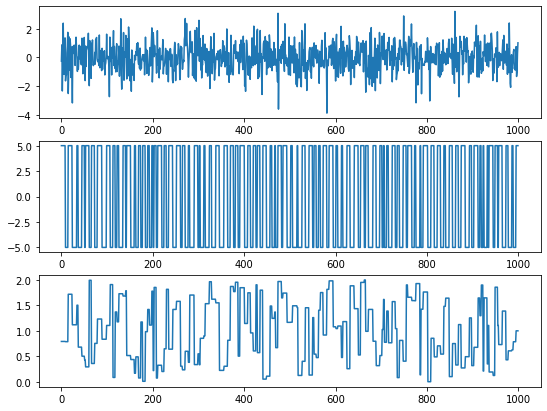

In [7]:
# Random Signals

# Time Vector
t = np.arange(0.0, 1.0, 0.001)
N = len(t)

# Raw Random Signal
mu = 0
std = 1
random_signal = mu + std * np.random.randn(N,1)

# PRBS 1

# prbs_signal = np.random.randint(2, size=(N,1))

# APRBS + PRBS

nstep = 1000

# random signal generation

a_range = [0,2]
a = np.random.rand(nstep) * (a_range[1]-a_range[0]) + a_range[0] # range for amplitude

b_range = [2, 10]
b = np.random.rand(nstep) *(b_range[1]-b_range[0]) + b_range[0] # range for frequency
b = np.round(b)
b = b.astype(int)

b[0] = 0

for i in range(1,np.size(b)):
    b[i] = b[i-1]+b[i]

# APRBS

i=0
aprbs_signal = np.zeros(nstep)
while b[i]<np.size(aprbs_signal):
    k = b[i]
    aprbs_signal[k:] = a[i]
    i=i+1

# PRBS 2

a = np.zeros(nstep)
j = 0
while j < nstep:
    a[j] = 5
    a[j+1] = -5
    j = j+2

i=0
prbs_signal = np.zeros(nstep)
while b[i]<np.size(prbs_signal):
    k = b[i]
    prbs_signal[k:] = a[i]
    i=i+1

# See Signals

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(9, 7))
axs[0].plot(random_signal)
axs[1].plot(prbs_signal)
axs[2].plot(aprbs_signal)

In [8]:
# Export to csv

def to_fwf(df, fname):
    content = tabulate(df.values.tolist(), list(df.columns), tablefmt="plain")
    open(fname, "w").write(content)

to_fwf(pd.DataFrame(random_signal),'signal_random.csv')
to_fwf(pd.DataFrame(prbs_signal),'signal_prbs.csv')
to_fwf(pd.DataFrame(aprbs_signal),'signal_aprbs.csv')

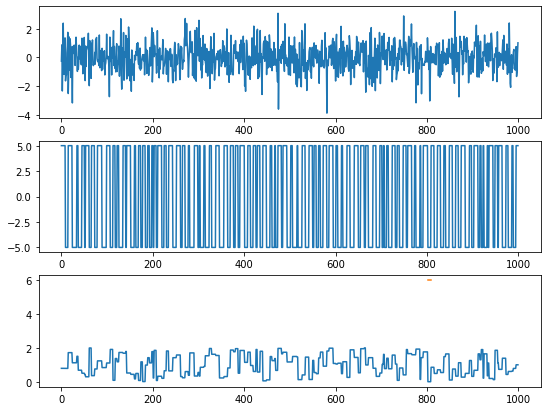

In [9]:
# Import from csv

random_signal2 = pd.read_fwf('signal_random.csv')
prbs_signal2 = pd.read_fwf('signal_prbs.csv')
aprbs_signal2 = pd.read_fwf('signal_aprbs.csv')

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(9, 7))
axs[0].plot(random_signal2)
axs[1].plot(prbs_signal2)
axs[2].plot(aprbs_signal2)

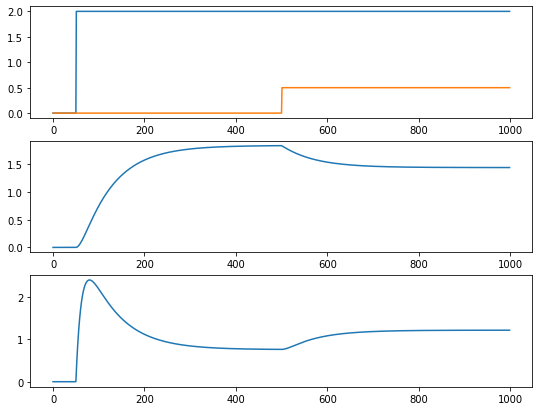

In [10]:
# DC Motor Sample 1

# Time Vector
t = np.arange(0.0, 1.0, 0.001)
N = len(t)

# Input Vector

u = np.zeros((N,2))

for i in range(N):
    if i > 50:
        u[i,0] = 2
    if i > 500:
        u[i,1] = 0.5

# Return tuple with two signals: Output Voltage and Current
dcm = DcMotor(t,u,state_0=[0.0,0.0])

# See Output Voltage and Current
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(9, 7))
axs[0].plot(u)
axs[1].plot(dcm.states[0])
axs[2].plot(dcm.states[1])

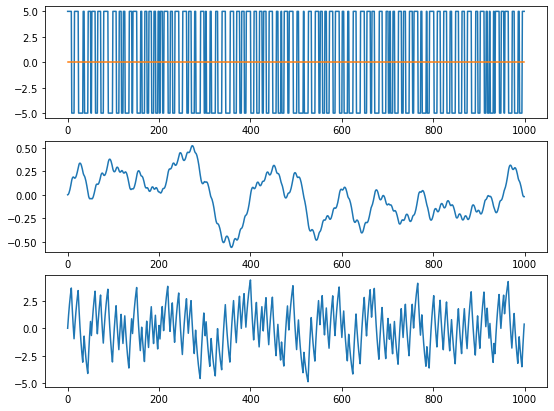

In [11]:
# DC Motor Sample 2

# Time Vector
t = np.arange(0.0, 1.0, 0.001)
N = len(t)

# Input Vector

u = np.zeros((N,2))

u[:,0] = prbs_signal

# Return tuple with two signals: Output Voltage and Current
dcm = DcMotor(t,u,state_0=[0.0,0.0])

# See Output Voltage and Current
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(9, 7))
axs[0].plot(u)
axs[1].plot(dcm.states[0])
axs[2].plot(dcm.states[1])

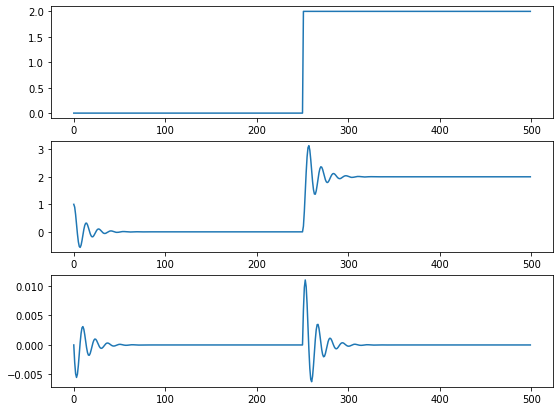

In [12]:
# RLC Sample

# Time Vector
t = np.arange(0.0, 0.5, 0.001)
N = len(t)

# Input Vector
u = np.zeros(N)
for i in range(N):
    if i > 250:
        u[i] = 2

# Return tuple with two signals: Output Voltage and Current
rlc = RlcSys(t,u,state_0=[1.0,0.0])

# See Output Voltage and Current
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(9, 7))
axs[0].plot(u)
axs[1].plot(rlc.states[0])
axs[2].plot(rlc.states[1])

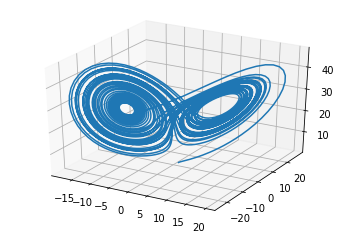

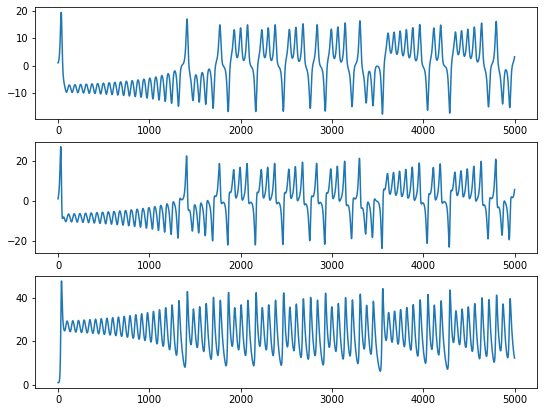

In [13]:
# Lorentz Sample

lorenz = LorenzSys(0.0, 50, 0.01)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(lorenz.states[:, 0], lorenz.states[:, 1], lorenz.states[:, 2])

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(9, 7))
axs[0].plot(lorenz.states[:, 0])
axs[1].plot(lorenz.states[:, 1])
axs[2].plot(lorenz.states[:, 2])